In [1]:
######################################################################
setwd("../Data")
load("mydrias.RData")

In [2]:
head(mydrias)
dim(mydrias)

,idpt,doi,lat.x,lon.x,alti.x,date,Tn,Tx,RR,ETP,⋯,lon.y,lat.y,alti.y,X_mean,X_median,X_stdev,X_min,X_max,X_majority,Dif_median
,<int>,<int>,<dbl>,<dbl>,<int>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9378,1,46.2218,3.94455,307,2004-01-01,7.21,15.04,0.781,0.919,⋯,3.94455,46.2218,307,103.8224,106,9.086075,74,128,106,-2.178
242,9378,2,46.2218,3.94455,307,2004-01-02,6.15,14.89,0.000,0.662,⋯,3.94455,46.2218,307,103.8224,106,9.086075,74,128,106,-2.178
249,9378,3,46.2218,3.94455,307,2004-01-03,5.08,5.96,0.000,0.483,⋯,3.94455,46.2218,307,103.8224,106,9.086075,74,128,106,-2.178
349,9378,4,46.2218,3.94455,307,2004-01-04,0.08,8.51,0.000,0.407,⋯,3.94455,46.2218,307,103.8224,106,9.086075,74,128,106,-2.178
108,9378,5,46.2218,3.94455,307,2004-01-05,1.39,8.90,0.000,0.948,⋯,3.94455,46.2218,307,103.8224,106,9.086075,74,128,106,-2.178
163,9378,6,46.2218,3.94455,307,2004-01-06,1.05,10.28,0.000,0.296,⋯,3.94455,46.2218,307,103.8224,106,9.086075,74,128,106,-2.178


[1] 181902     26

In [3]:
## Charge la fonction du modèle de bilan hydrique à 2 réservoirs
source("../FonctionsR/FonctionBilanHydrique2R.R")
ls()

[1] "BH2R"    "mydrias"

In [4]:
## Partition de la RU en 2 réservoirs
mydrias$RU1 <- mydrias$X_median * 0.4 ## réservoir superfiel
mydrias$RU2 <- mydrias$X_median * 0.6 ## réservoir profond
save(mydrias, file = "mydrias.RData")

In [5]:
head(mydrias)
## que voyez vous concernant l'ordre des dates ?

,idpt,doi,lat.x,lon.x,alti.x,date,Tn,Tx,RR,ETP,⋯,alti.y,X_mean,X_median,X_stdev,X_min,X_max,X_majority,Dif_median,RU1,RU2
,<int>,<int>,<dbl>,<dbl>,<int>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9378,1,46.2218,3.94455,307,2004-01-01,7.21,15.04,0.781,0.919,⋯,307,103.8224,106,9.086075,74,128,106,-2.178,42.4,63.6
242,9378,2,46.2218,3.94455,307,2004-01-02,6.15,14.89,0.000,0.662,⋯,307,103.8224,106,9.086075,74,128,106,-2.178,42.4,63.6
249,9378,3,46.2218,3.94455,307,2004-01-03,5.08,5.96,0.000,0.483,⋯,307,103.8224,106,9.086075,74,128,106,-2.178,42.4,63.6
349,9378,4,46.2218,3.94455,307,2004-01-04,0.08,8.51,0.000,0.407,⋯,307,103.8224,106,9.086075,74,128,106,-2.178,42.4,63.6
108,9378,5,46.2218,3.94455,307,2004-01-05,1.39,8.90,0.000,0.948,⋯,307,103.8224,106,9.086075,74,128,106,-2.178,42.4,63.6
163,9378,6,46.2218,3.94455,307,2004-01-06,1.05,10.28,0.000,0.296,⋯,307,103.8224,106,9.086075,74,128,106,-2.178,42.4,63.6


In [7]:
## Création de l'objet idpt qui contient les identifiants
## des points de grille Drias
idpt <- unique(mydrias$idpt)

In [8]:
length(idpt)
str(mydrias)
#mydrias$date <- as.character(mydrias$date)

[1] 497

'data.frame':	181902 obs. of  28 variables:
 $ idpt      : int  9378 9378 9378 9378 9378 9378 9378 9378 9378 9378 ...
 $ doi       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ lat.x     : num  46.2 46.2 46.2 46.2 46.2 ...
 $ lon.x     : num  3.94 3.94 3.94 3.94 3.94 ...
 $ alti.x    : int  307 307 307 307 307 307 307 307 307 307 ...
 $ date      : Date, format: "2004-01-01" "2004-01-02" ...
 $ Tn        : num  7.21 6.15 5.08 0.08 1.39 1.05 3.71 5.4 2.72 0.93 ...
 $ Tx        : num  15.04 14.89 5.96 8.51 8.9 ...
 $ RR        : num  0.781 0 0 0 0 ...
 $ ETP       : num  0.919 0.662 0.483 0.407 0.948 0.296 0.388 0.308 0.266 0.625 ...
 $ ETP0      : num  0.76 0.791 0.208 0.613 0.605 ...
 $ kcc       : num  0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 ...
 $ kcl       : num  0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 ...
 $ kcs       : num  0.2 0.2 0.2 0.2 0.2 ...
 $ ETM       : num  0.1838 0.1324 0.0966 0.0814 0.1896 ...
 $ ETM0      : num  0.1521 0.1581 0.0416 0.1227 0.121 ...
 $ lon.y     : num  3.94 3.94

In [9]:
## Création d'un liste vide qui va contenir les résultats
## la liste a autant d'éléments que de points de grille
resuBH <- vector("list", length(idpt))

### Calcul du BH : version séquentielle i.e. traite les points les uns à
## la suite des autres via une boucle for

ptm <- proc.time() ## start time
cpt <-1 ## initialisation d'un compteur pour le remplissage de la liste
for (i in idpt) { ## Boucle du calcul du BH pour chaque point de grille
  print(i)
  tmp <- subset(mydrias, idpt == i)
  ## construction du vecteur date. Odre jour, mois, années à adapter
  ## en fonction de l'ordre dans lequel sont vos dates
  #tmp$date <- as.Date(tmp$date, "%d/%m/%Y")
  ## ordonne les données par date
  tmp <- tmp[order(tmp$date), ]
  # application du modèle sur tout la période
  BH.tmp <- BH2R(RR = tmp$RR, ETM = tmp$ETM, RU1 = tmp$RU1[1], RU2 = tmp$RU2[1])
  BH.tmp <- cbind(tmp[, c("idpt", "date")], BH.tmp )
  ## remplissage de la liste avec les résultats
  resuBH[[cpt]] <- BH.tmp
  cpt <- cpt + 1
}

proc.time() - ptm ## end time


[1] 9378
[1] 9379
[1] 9380
[1] 9381
[1] 9382
[1] 9386
[1] 9521
[1] 9522
[1] 9523
[1] 9524
[1] 9525
[1] 9529
[1] 9665
[1] 9666
[1] 9667
[1] 9668
[1] 9669
[1] 9670
[1] 9671
[1] 9672
[1] 9808
[1] 9809
[1] 9810
[1] 9811
[1] 9812
[1] 9813
[1] 9814
[1] 9815
[1] 9816
[1] 9950
[1] 9951
[1] 9952
[1] 9953
[1] 9954
[1] 9955
[1] 9956
[1] 9957
[1] 9958
[1] 9959
[1] 9963
[1] 9964
[1] 10091
[1] 10092
[1] 10093
[1] 10094
[1] 10095
[1] 10096
[1] 10097
[1] 10098
[1] 10099
[1] 10100
[1] 10101
[1] 10102
[1] 10103
[1] 10104
[1] 10105
[1] 10106
[1] 10234
[1] 10235
[1] 10236
[1] 10237
[1] 10238
[1] 10239
[1] 10240
[1] 10241
[1] 10242
[1] 10243
[1] 10244
[1] 10245
[1] 10246
[1] 10247
[1] 10248
[1] 10249
[1] 10250
[1] 10371
[1] 10372
[1] 10373
[1] 10374
[1] 10375
[1] 10376
[1] 10377
[1] 10378
[1] 10379
[1] 10380
[1] 10381
[1] 10382
[1] 10383
[1] 10384
[1] 10385
[1] 10386
[1] 10387
[1] 10388
[1] 10389
[1] 10390
[1] 10391
[1] 10392
[1] 10514
[1] 10515
[1] 10516
[1] 10517
[1] 10518
[1] 10519
[1] 10520
[1] 10521
[

utilisateur     système      écoulé 
     10.582       0.000      10.582 

In [14]:
str(resuBH[[1]])

'data.frame':	366 obs. of  13 variables:
 $ idpt: int  9378 9378 9378 9378 9378 9378 9378 9378 9378 9378 ...
 $ date: Date, format: "2004-01-01" "2004-01-02" ...
 $ RR  : num  0.781 0 0 0 0 ...
 $ ETM : num  0.1838 0.1324 0.0966 0.0814 0.1896 ...
 $ R1  : num  42.4 42.3 42.2 42.1 41.9 ...
 $ R2  : num  63.6 63.6 63.6 63.6 63.6 63.6 63.6 63.6 63.6 63.6 ...
 $ ETR1: num  0.1838 0.1324 0.0966 0.0814 0.1896 ...
 $ ETR2: num  0 0 0 0 0 0 0 0 0 0 ...
 $ DR1 : num  0.184 0.132 0.229 0.31 0.5 ...
 $ DR2 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ RR1 : num  0.184 0 0 0 0 ...
 $ RR2 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Ec  : num  0.597 NA NA NA NA ...


In [12]:
save(resuBH, file="resuBH_historic.RData")

In [15]:
## Examen des résultats pour le premier point de grille
BH.9378 <- resuBH[[1]]
head(BH.9378)
BH.1an <- BH.9378[1:365,]
## Calcul du bilan hydrique relatif 
BH.1an$BH <- (BH.1an$R1 + BH.1an$R2)/(BH.1an$R1[1] + BH.1an$R2[1])

,idpt,date,RR,ETM,R1,R2,ETR1,ETR2,DR1,DR2,RR1,RR2,Ec
,<int>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9378,2004-01-01,0.781,0.1838,42.4000,63.6,0.1838,0,0.1838,0,0.1838,0,0.5972
242,9378,2004-01-02,0.000,0.1324,42.2676,63.6,0.1324,0,0.1324,0,0.0000,0,NA
249,9378,2004-01-03,0.000,0.0966,42.1710,63.6,0.0966,0,0.2290,0,0.0000,0,NA
349,9378,2004-01-04,0.000,0.0814,42.0896,63.6,0.0814,0,0.3104,0,0.0000,0,NA
108,9378,2004-01-05,0.000,0.1896,41.9000,63.6,0.1896,0,0.5000,0,0.0000,0,NA
163,9378,2004-01-06,0.000,0.0592,41.8408,63.6,0.0592,0,0.5592,0,0.0000,0,NA


In [18]:
BH.1an <- BH.9378[1:365,]
BH.1an$BH <- (BH.1an$R1 + BH.1an$R2)/(BH.1an$R1[1] + BH.1an$R2[1])

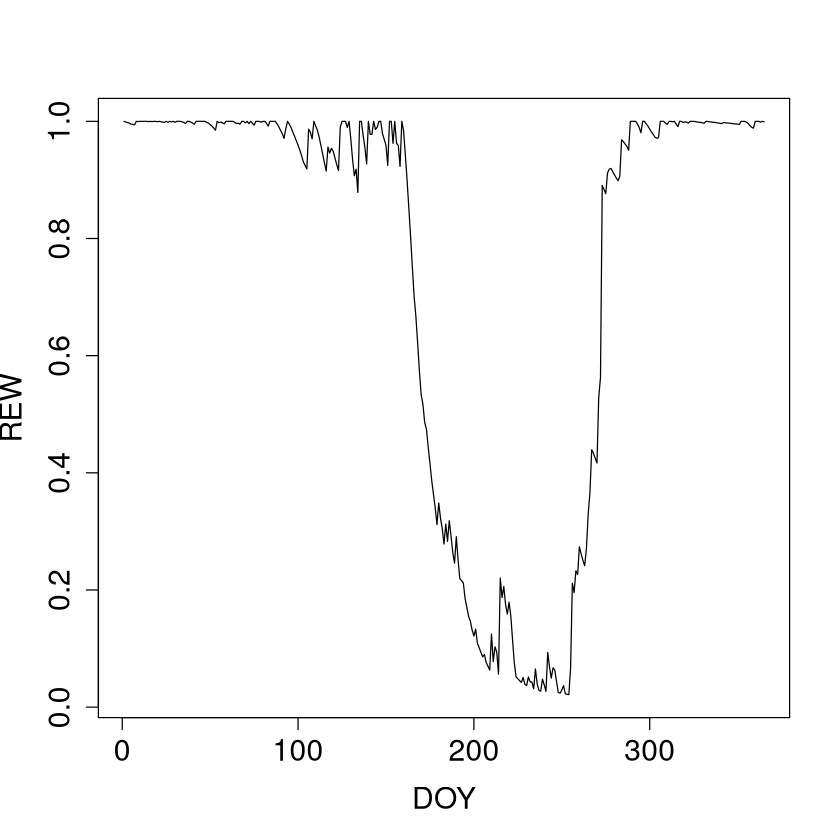

In [19]:
#png(filename = "/home/thierry/myTCloud/umi_umr/ANR_DYVALOCCA/rew.png",
    #width = 1200, height = 700, units = "px", pointsize = 12,
     #bg = "white", type = c("cairo", "cairo-png", "Xlib", "quartz"))

## Trace l'évolution du BH relatif pour la première année 
## du premier point de grille 
plot(BH.1an$BH, type = "l", ylab= "REW", xlab="DOY", cex.lab=1.5, cex.axis=1.5)

#dev.off()


In [21]:
mean(BH.1an$RR-BH.1an$ETM)
min(BH.1an$BH)
head(BH.1an)

[1] 0.7347234

[1] 0.02129562

,idpt,date,RR,ETM,R1,R2,ETR1,ETR2,DR1,DR2,RR1,RR2,Ec,BH
,<int>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9378,2004-01-01,0.781,0.1838,42.4000,63.6,0.1838,0,0.1838,0,0.1838,0,0.5972,1.0000000
242,9378,2004-01-02,0.000,0.1324,42.2676,63.6,0.1324,0,0.1324,0,0.0000,0,NA,0.9987509
249,9378,2004-01-03,0.000,0.0966,42.1710,63.6,0.0966,0,0.2290,0,0.0000,0,NA,0.9978396
349,9378,2004-01-04,0.000,0.0814,42.0896,63.6,0.0814,0,0.3104,0,0.0000,0,NA,0.9970717
108,9378,2004-01-05,0.000,0.1896,41.9000,63.6,0.1896,0,0.5000,0,0.0000,0,NA,0.9952830
163,9378,2004-01-06,0.000,0.0592,41.8408,63.6,0.0592,0,0.5592,0,0.0000,0,NA,0.9947245


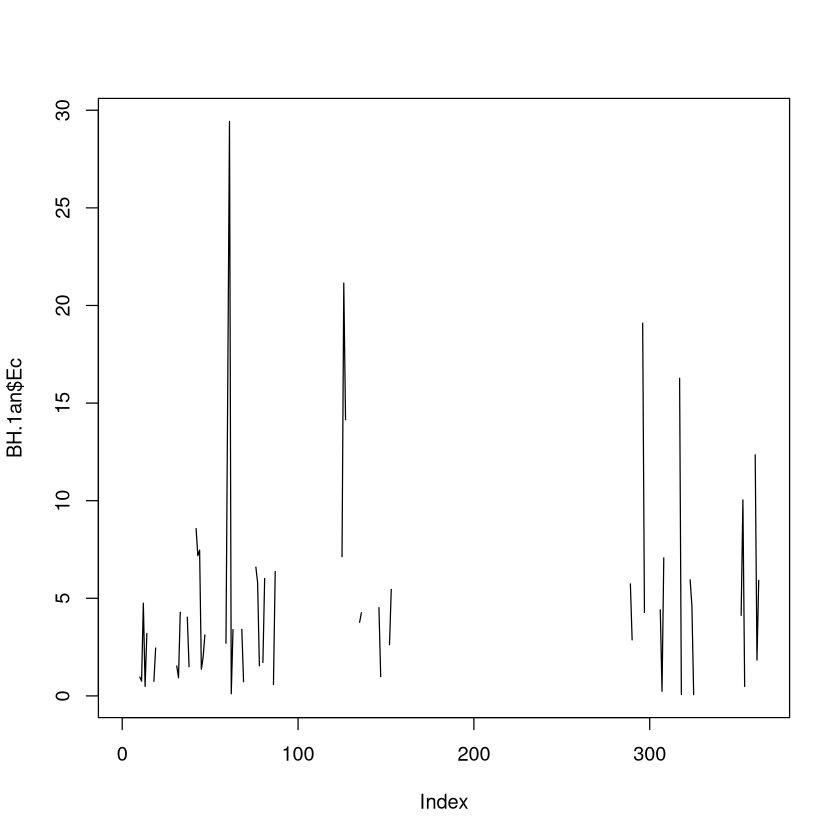

In [22]:
plot(BH.1an$Ec, type= "l")

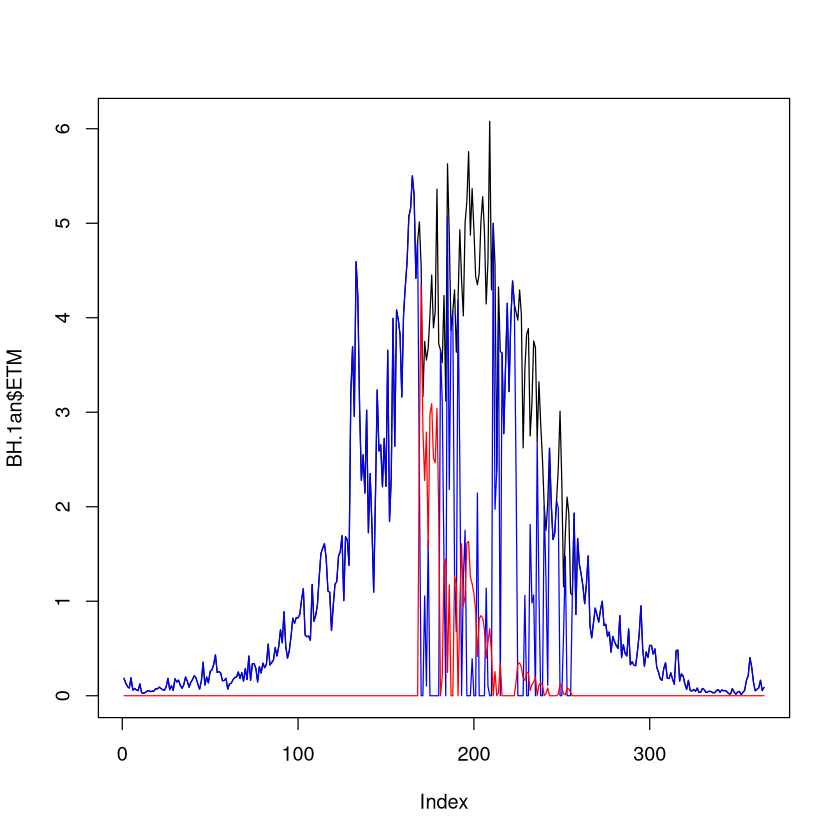

In [23]:
## Partition ETM
plot(BH.1an$ETM, type="l")
lines(BH.1an$ETR1, col="blue")
lines(BH.1an$ETR2, col = "red")

In [24]:
head(BH.9378)

,idpt,date,RR,ETM,R1,R2,ETR1,ETR2,DR1,DR2,RR1,RR2,Ec
,<int>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9378,2004-01-01,0.781,0.1838,42.4000,63.6,0.1838,0,0.1838,0,0.1838,0,0.5972
242,9378,2004-01-02,0.000,0.1324,42.2676,63.6,0.1324,0,0.1324,0,0.0000,0,NA
249,9378,2004-01-03,0.000,0.0966,42.1710,63.6,0.0966,0,0.2290,0,0.0000,0,NA
349,9378,2004-01-04,0.000,0.0814,42.0896,63.6,0.0814,0,0.3104,0,0.0000,0,NA
108,9378,2004-01-05,0.000,0.1896,41.9000,63.6,0.1896,0,0.5000,0,0.0000,0,NA
163,9378,2004-01-06,0.000,0.0592,41.8408,63.6,0.0592,0,0.5592,0,0.0000,0,NA


In [25]:
length(resuBH)

[1] 497

In [26]:
##########################################################
## Version parallèle du calcul de BH
lpts <- split(mydrias,f=as.factor(mydrias$idpt))

myfun <- function(x){
    #x$date <- as.Date(x$date,"%m/%d/%Y")
    x <- x[order(x$date),]
    resu <- cbind(x[,c("idpt","date")],
                  BH2R(RR=x$RR,ETM=x$ETM,RU1 = x$RU1[1], RU2 = x$RU2[1]))
    return(resu)
}

In [27]:
library(parallel)
cl <- makeCluster(12,type="PSOCK")
clusterExport(cl, list("BH2R"))
ptm <- proc.time()
resuparBH <- parLapply(cl = cl, lpts, myfun)
proc.time() - ptm

utilisateur     système      écoulé 
      0.052       0.025       2.392 